In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix

In [118]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255
x_test = x_test/255

In [119]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


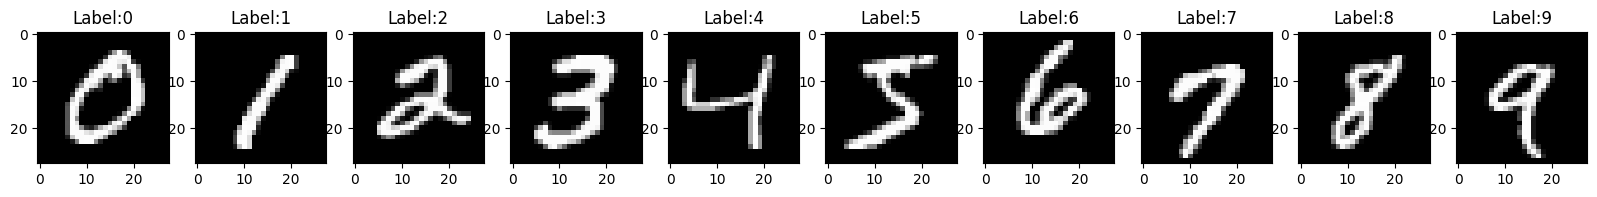

In [120]:
# Let‘s visualize one example per each digit using a for loop and matplotlib subplot
num_classes = 10

# Create a subplot
fig, ax = plt.subplots(1, num_classes, figsize=(20,20)) # 1 row, 10 columns (num_classes)

# Loop through 10 classes from train dataset and add labels from test dataset
for i in range(num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap="gray")
  ax[i].set_title(f"Label:{i}")


In [121]:
x_train = x_train.reshape(x_train.shape[0], 28*28) #we are doing this to flatten out the 28*28 grid to 784 length array
x_test = x_test.reshape(x_test.shape[0] , 28*28)
#tf.keras.normalization
x_train.shape

(60000, 784)

In [122]:
model = Sequential([
    tf.keras.Input(shape=(784,)),
    Dense(128, activation="relu", name = 'Layer_1', kernel_regularizer= tf.keras.regularizers.L2(0.00000000001)),
    Dense(64, activation="relu", name = 'Layer_2', kernel_regularizer= tf.keras.regularizers.L2(0.00000000001)),
    Dense(10, activation="linear", name = 'Layer_3', kernel_regularizer= tf.keras.regularizers.L2(0.00000000001)),
], name = 'MNIST_model')

In [123]:
model.compile(optimizer= tf.keras.optimizers.Adam( learning_rate= 0.01), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model.summary()

Model: "MNIST_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Layer_1 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [124]:
result = model.fit( x_train, y_train, batch_size = 512 , epochs = 20 )

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8299 - loss: 0.5326
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9635 - loss: 0.1164
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9739 - loss: 0.0830
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9819 - loss: 0.0562
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9817 - loss: 0.0587
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9848 - loss: 0.0458
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9872 - loss: 0.0392
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9891 - loss: 0.0331
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9883 - loss: 0.0350
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9885 - loss: 0.0341
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9883 - loss: 0.0366
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [125]:
# Evaluate train and test
train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print results
print(f"Train Loss: {train_loss}, Train Accuracy: {train_acc}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9944 - loss: 0.0177
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9728 - loss: 0.1641
Train Loss: 0.017833510413765907, Train Accuracy: 0.9943333268165588
Test Loss: 0.14070139825344086, Test Accuracy: 0.9751999974250793


In [126]:
#now predicting the test data
y_pred = model.predict(x_test)
lol = tf.nn.softmax(y_pred)
y_pred = np.argmax(lol, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


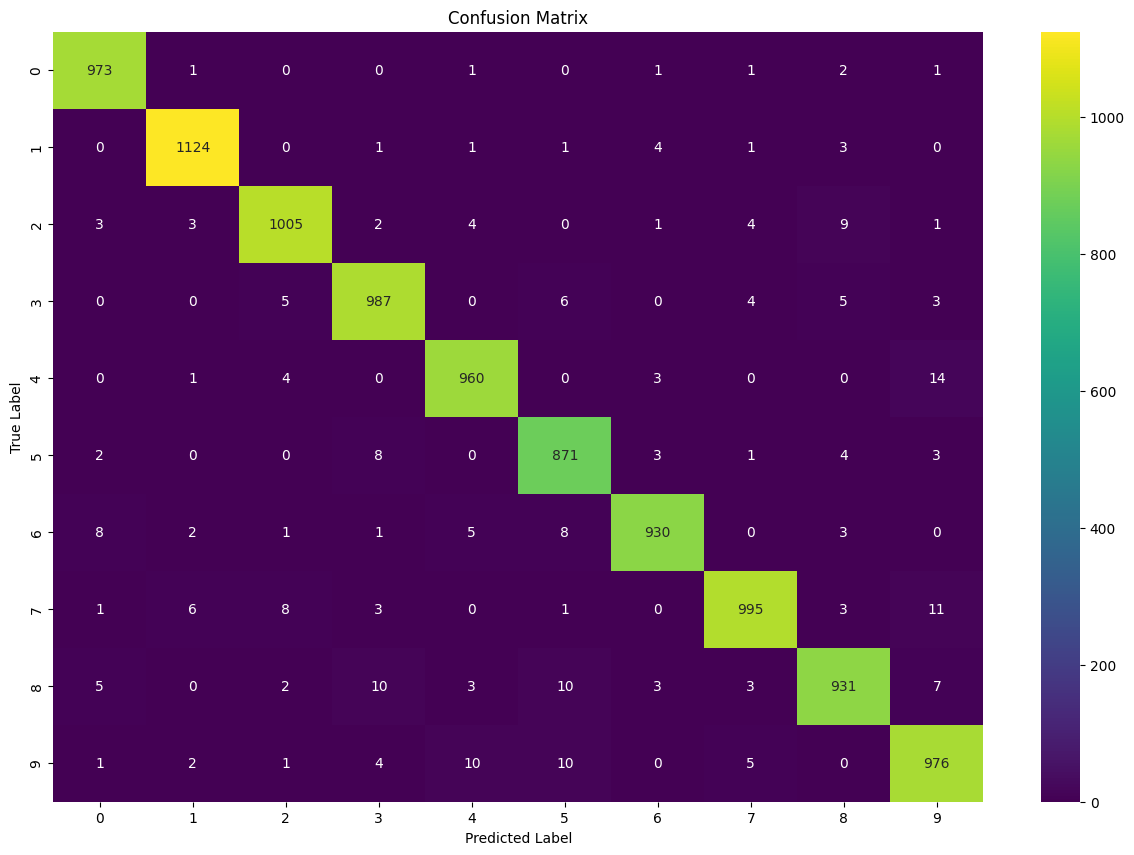

In [127]:
# generate a confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)

# visualize confusion matrix with matplotlib and seaborn
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt="d", ax=ax, cmap="viridis")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_title("Confusion Matrix");

In [128]:
#model.save('MNIST_28_model_4.keras')